In [154]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression
from sklearn.preprocessing import StandardScaler, RobustScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.cluster import dbscan
from sklearn.feature_selection import f_classif, mutual_info_classif, chi2

# Data preprocessing

In [3]:
column_names = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'target']
df = pd.read_csv('/Users/babu/Mirror/Python_Programs/Scikit/credit_data.csv', 
           header=None, names=column_names, na_values='?')

In [4]:
df1 = df.dropna()

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 689
Data columns (total 16 columns):
A1        653 non-null object
A2        653 non-null float64
A3        653 non-null float64
A4        653 non-null object
A5        653 non-null object
A6        653 non-null object
A7        653 non-null object
A8        653 non-null float64
A9        653 non-null object
A10       653 non-null object
A11       653 non-null int64
A12       653 non-null object
A13       653 non-null object
A14       653 non-null float64
A15       653 non-null int64
target    653 non-null object
dtypes: float64(4), int64(2), object(10)
memory usage: 86.7+ KB


In [6]:
df1.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [7]:
df1.describe()

,A2,A3,A8,A11,A14,A15
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,31.503813,4.829533,2.244296,2.502297,180.359877,1013.761103
std,11.838267,5.027077,3.371120,4.968497,168.296811,5253.278504
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.580000,1.040000,0.165000,0.000000,73.000000,0.000000
50%,28.420000,2.835000,1.000000,0.000000,160.000000,5.000000
75%,38.250000,7.500000,2.625000,3.000000,272.000000,400.000000
max,76.750000,28.000000,28.500000,67.000000,2000.000000,100000.000000


In [8]:
X_raw = df1.iloc[:,0:15].to_numpy()

In [9]:
X_raw[0:5]

array([['b', 30.83, 0.0, 'u', 'g', 'w', 'v', 1.25, 't', 't', 1, 'f', 'g',
        202.0, 0],
       ['a', 58.67, 4.46, 'u', 'g', 'q', 'h', 3.04, 't', 't', 6, 'f',
        'g', 43.0, 560],
       ['a', 24.5, 0.5, 'u', 'g', 'q', 'h', 1.5, 't', 'f', 0, 'f', 'g',
        280.0, 824],
       ['b', 27.83, 1.54, 'u', 'g', 'w', 'v', 3.75, 't', 't', 5, 't',
        'g', 100.0, 3],
       ['b', 20.17, 5.625, 'u', 'g', 'w', 'v', 1.71, 't', 'f', 0, 'f',
        's', 120.0, 0]], dtype=object)

In [10]:
X_raw.shape

(653, 15)

In [11]:
X_raw[0,10]

1

In [12]:
ohe = OneHotEncoder()

In [13]:
X_raw[:,[0,3,4,5,6,8,9,11,12]]

array([['b', 'u', 'g', ..., 't', 'f', 'g'],
       ['a', 'u', 'g', ..., 't', 'f', 'g'],
       ['a', 'u', 'g', ..., 'f', 'f', 'g'],
       ...,
       ['a', 'y', 'p', ..., 't', 't', 'g'],
       ['b', 'u', 'g', ..., 'f', 'f', 'g'],
       ['b', 'u', 'g', ..., 'f', 't', 'g']], dtype=object)

In [14]:
ohe.fit(X_raw[:,[0,3,4,5,6,8,9,11,12]])

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

In [15]:
ohe.categories_

[array(['a', 'b'], dtype=object),
 array(['l', 'u', 'y'], dtype=object),
 array(['g', 'gg', 'p'], dtype=object),
 array(['aa', 'c', 'cc', 'd', 'e', 'ff', 'i', 'j', 'k', 'm', 'q', 'r', 'w',
        'x'], dtype=object),
 array(['bb', 'dd', 'ff', 'h', 'j', 'n', 'o', 'v', 'z'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['g', 'p', 's'], dtype=object)]

In [16]:
X_categorical = ohe.transform(X_raw[:,[0,3,4,5,6,8,9,11,12]])

In [17]:
X_categorical

<653x40 sparse matrix of type '<class 'numpy.float64'>'
	with 5877 stored elements in Compressed Sparse Row format>

In [18]:
print(X_categorical[:2])

  (0, 1)	1.0
  (0, 3)	1.0
  (0, 5)	1.0
  (0, 20)	1.0
  (0, 29)	1.0
  (0, 32)	1.0
  (0, 34)	1.0
  (0, 35)	1.0
  (0, 37)	1.0
  (1, 0)	1.0
  (1, 3)	1.0
  (1, 5)	1.0
  (1, 18)	1.0
  (1, 25)	1.0
  (1, 32)	1.0
  (1, 34)	1.0
  (1, 35)	1.0
  (1, 37)	1.0


In [19]:
X_raw1 = np.array(X_raw[:,[1,2,7,10,13,14]], dtype=np.float64)

In [20]:
X_continuous = StandardScaler().fit_transform(X_raw1)

In [21]:
X_continuous.shape

(653, 6)

In [22]:
#np.savetxt("/Users/babu/Mirror/Python_Programs/Scikit/Data/standard_scaling.csv",
#          X_continuous, delimiter=',') #just check the standardized values

# Exploratory data analysis

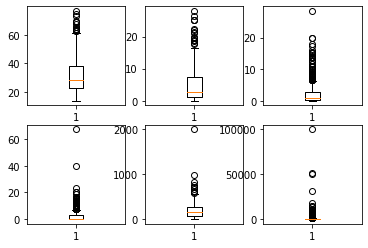

In [23]:
plt.subplot(231)
plt.boxplot(X_raw1[:,0])
plt.subplot(232)
plt.boxplot(X_raw1[:,1])
plt.subplot(233)
plt.boxplot(X_raw1[:,2])
plt.subplot(234)
plt.boxplot(X_raw1[:,3])
plt.subplot(235)
plt.boxplot(X_raw1[:,4])
plt.subplot(236)
plt.boxplot(X_raw1[:,5])
plt.show()

In [24]:
X = hstack((X_continuous, X_categorical))

In [25]:
X.shape

(653, 46)

In [26]:
type(X)

scipy.sparse.coo.coo_matrix

In [27]:
y_raw = np.array(df1['target'])

In [28]:
y_raw1 = y_raw[:, np.newaxis]

In [29]:
y_raw1.shape

(653, 1)

In [30]:
y_raw1.ndim

2

In [153]:
y_raw[:5]

array(['+', '+', '+', '+', '+'], dtype=object)

In [31]:
oe = OrdinalEncoder(categories=[['-','+']])

In [32]:
oe.fit(y_raw1)

OrdinalEncoder(categories=[['-', '+']], dtype=<class 'numpy.float64'>)

In [33]:
y = oe.transform(y_raw1)

In [34]:
oe.categories_

[array(['-', '+'], dtype=object)]

In [35]:
y.shape

(653, 1)

In [152]:
y[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=1)

In [37]:
X_train.shape

(489, 46)

# Decision Tree Classifier

In [38]:
cls1 = DecisionTreeClassifier(random_state=1, class_weight='balanced', max_depth=4, min_samples_split=5, min_samples_leaf=1)

In [39]:
cls1 = cls1.fit(X_train, y_train)

In [40]:
cls1.score(X_test, y_test)

0.8475609756097561

In [41]:
# tree.plot_tree(cls1)

In [42]:
import graphviz

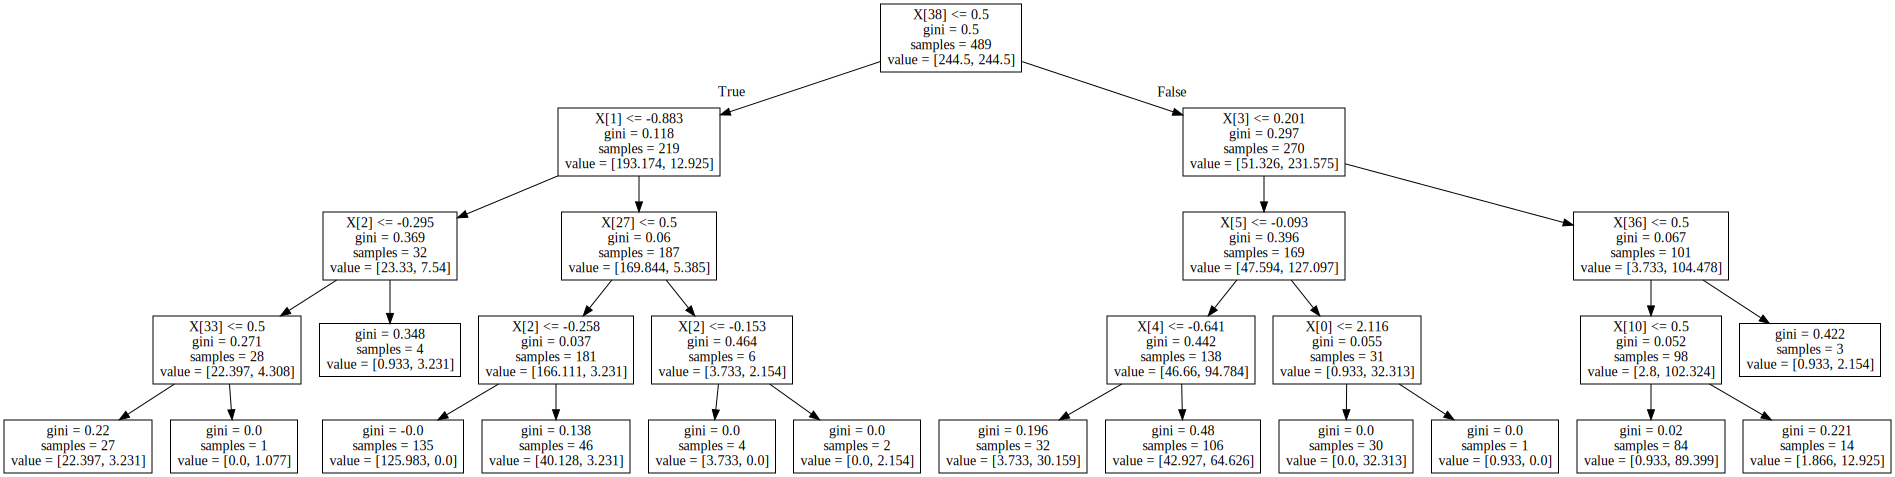

In [43]:
dot_data = tree.export_graphviz(cls1, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [44]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

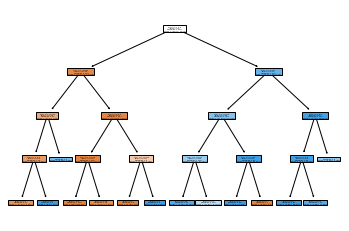

In [45]:
tree.plot_tree(cls1, filled=True)
plt.show()

In [46]:
cls1.n_features_

46

In [47]:
cls1.tree_

In [48]:
cls1.tree_.node_count # Number of nodes in the tree

27

In [49]:
cls1.tree_.children_left # id of the left child nodes

array([ 1,  2,  3,  4, -1, -1, -1,  8,  9, -1, -1, 12, -1, -1, 15, 16, 17,
       -1, -1, 20, -1, -1, 23, 24, -1, -1, -1])

In [50]:
cls1.tree_.children_right # id of the right child nodes

array([14,  7,  6,  5, -1, -1, -1, 11, 10, -1, -1, 13, -1, -1, 22, 19, 18,
       -1, -1, 21, -1, -1, 26, 25, -1, -1, -1])

In [51]:
cls1.tree_.feature # feature used for splitting the node

array([38,  1,  2, 33, -2, -2, -2, 27,  2, -2, -2,  2, -2, -2,  3,  5,  4,
       -2, -2,  0, -2, -2, 36, 10, -2, -2, -2])

In [52]:
cls1.tree_.threshold # threshold value at the node

array([ 0.5       , -0.88280565, -0.29517125,  0.5       , -2.        ,
       -2.        , -2.        ,  0.5       , -0.25806315, -2.        ,
       -2.        , -0.15267619, -2.        , -2.        ,  0.20095971,
       -0.09301532, -0.6413821 , -2.        , -2.        ,  2.11647344,
       -2.        , -2.        ,  0.5       ,  0.5       , -2.        ,
       -2.        , -2.        ])

In [53]:
cls1.get_n_leaves()

14

In [54]:
cls1.get_depth()

4

In [55]:
cls1.apply(X_test) # index of the leaf where each sample ends up

array([24, 10, 10,  9, 24,  9,  9,  9, 24, 18, 17, 20,  9, 18,  9, 18, 24,
        9, 24, 10, 24, 24,  9,  9, 24, 20,  9,  9, 18, 18, 20, 10, 18, 18,
        9, 24,  9, 10,  9,  4, 18,  9, 18,  4,  9,  4, 24,  9,  9, 24, 18,
       10,  9, 24,  9, 10, 25, 24, 10,  4, 24,  9,  4,  9, 18, 20, 20,  9,
        6, 24,  9, 24,  9, 18, 10, 10,  9, 24, 18, 24,  4, 25,  9, 18, 24,
        9,  9,  9, 18, 17, 24, 20, 18,  9, 18,  9,  9, 24,  4, 24, 20,  9,
       20,  4, 25, 18, 17, 18, 18,  9, 24,  9,  9,  9, 24, 10, 24,  9,  9,
       10, 20, 24, 24,  9,  9,  9, 20, 24, 18, 21, 10,  9, 18, 10, 26,  9,
        9,  4, 17,  9, 24,  6, 24, 17,  9,  9, 10, 10,  9, 18, 10, 10, 24,
       18,  9,  9, 24, 24, 20, 10, 10,  9, 24, 10])

In [56]:
print(cls1.decision_path(X_test[10])) # decision path in the tree for the given sample

  (0, 0)	1
  (0, 14)	1
  (0, 15)	1
  (0, 16)	1
  (0, 17)	1


In [57]:
cls1.predict_proba(X_test)

array([[0.01033086, 0.98966914],
       [0.92547644, 0.07452356],
       [0.92547644, 0.07452356],
       [1.        , 0.        ],
       [0.01033086, 0.98966914],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.01033086, 0.98966914],
       [0.39912851, 0.60087149],
       [0.11014071, 0.88985929],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.39912851, 0.60087149],
       [1.        , 0.        ],
       [0.39912851, 0.60087149],
       [0.01033086, 0.98966914],
       [1.        , 0.        ],
       [0.01033086, 0.98966914],
       [0.92547644, 0.07452356],
       [0.01033086, 0.98966914],
       [0.01033086, 0.98966914],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.01033086, 0.98966914],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.39912851, 0.60087149],
       [0.39912851, 0.60087149],
       [0.

In [58]:
cls1.predict(X_test)

array([1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0.])

In [59]:
# SVM with rbf kernel

In [60]:
svc1 = SVC(C=1.0, kernel='rbf', gamma='scale', class_weight='balanced', random_state=1)

In [61]:
svc1.fit(X_train, np.ravel(y_train))

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [62]:
svc1.score(X_test, y_test)

0.8719512195121951

In [63]:
# Logistic Regression

In [64]:
log1 = LogisticRegression(C=1.0, class_weight='balanced', random_state=1, max_iter=1000, multi_class='ovr')

In [65]:
log1.fit(X_train, np.ravel(y_train))

/Users/babu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
log1.score(X_test, y_test) # better score than Decision Tree!

0.8780487804878049

In [67]:
log1.predict_proba(X_test)

array([[1.58273500e-02, 9.84172650e-01],
       [9.33456504e-01, 6.65434957e-02],
       [9.18483196e-01, 8.15168036e-02],
       [9.33282126e-01, 6.67178742e-02],
       [1.75783053e-02, 9.82421695e-01],
       [7.04057108e-01, 2.95942892e-01],
       [9.46947142e-01, 5.30528582e-02],
       [9.68008074e-01, 3.19919260e-02],
       [8.74805631e-03, 9.91251944e-01],
       [3.71997256e-02, 9.62800274e-01],
       [2.16522536e-01, 7.83477464e-01],
       [1.63676078e-01, 8.36323922e-01],
       [9.78295113e-01, 2.17048872e-02],
       [2.31340737e-01, 7.68659263e-01],
       [9.27943708e-01, 7.20562924e-02],
       [4.26144732e-02, 9.57385527e-01],
       [3.99731803e-02, 9.60026820e-01],
       [9.76183075e-01, 2.38169250e-02],
       [1.54844952e-01, 8.45155048e-01],
       [8.54598747e-01, 1.45401253e-01],
       [1.31361936e-01, 8.68638064e-01],
       [8.33739126e-03, 9.91662609e-01],
       [9.24350601e-01, 7.56493990e-02],
       [8.90596463e-01, 1.09403537e-01],
       [3.221739

In [68]:
# Logistic Regression CV

In [69]:
LogRegCV1 = LogisticRegressionCV(Cs=20, max_iter=10000, class_weight='balanced', multi_class='ovr', random_state=1, solver='sag')

In [70]:
LogRegCV1.fit(X_train, np.ravel(y_train))

/Users/babu/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=20, class_weight='balanced', cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=10000, multi_class='ovr', n_jobs=None,
                     penalty='l2', random_state=1, refit=True, scoring=None,
                     solver='sag', tol=0.0001, verbose=0)

In [71]:
LogRegCV1.score(X_test, y_test)

0.8780487804878049

In [72]:
LogRegCV1.C_

array([0.08858668])

In [73]:
LogRegCV1.Cs_

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

# Random Forest Classifier

In [74]:
rfc1 = RandomForestClassifier(n_estimators=100, max_depth=None, 
    max_features="sqrt", bootstrap=True, random_state=1, 
    class_weight='balanced_subsample')

In [75]:
rfc1 = rfc1.fit(X_train, np.ravel(y_train))

In [76]:
rfc1.score(X_test, np.ravel(y_test))

0.8902439024390244

In [77]:
rfc1.classes_

array([0., 1.])

In [78]:
rfc1.n_features_

46

In [79]:
rfc1.feature_importances_

array([0.05804258, 0.06054971, 0.08543836, 0.05662105, 0.05996342,
       0.05544551, 0.00673427, 0.00786809, 0.00130692, 0.00812119,
       0.00719779, 0.00801994, 0.00089778, 0.00846243, 0.00531593,
       0.00828278, 0.00676348, 0.00264056, 0.00265047, 0.00905711,
       0.00837826, 0.00116604, 0.00910371, 0.00405872, 0.00753257,
       0.00026076, 0.00549563, 0.00711781, 0.0051258 , 0.00043302,
       0.00750484, 0.00993284, 0.00288379, 0.00220916, 0.        ,
       0.00963338, 0.00129681, 0.19365286, 0.18455831, 0.02575357,
       0.0245284 , 0.0094716 , 0.00825746, 0.00614486, 0.        ,
       0.0061204 ])

In [80]:
# Let us try Random Forest with ordinal encoded features

In [81]:
oe1 = OrdinalEncoder()

In [82]:
X_ordinal = oe1.fit_transform(X_raw[:,[0,3,4,5,6,8,9,11,12]])

In [83]:
oe1.categories_

[array(['a', 'b'], dtype=object),
 array(['l', 'u', 'y'], dtype=object),
 array(['g', 'gg', 'p'], dtype=object),
 array(['aa', 'c', 'cc', 'd', 'e', 'ff', 'i', 'j', 'k', 'm', 'q', 'r', 'w',
        'x'], dtype=object),
 array(['bb', 'dd', 'ff', 'h', 'j', 'n', 'o', 'v', 'z'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['g', 'p', 's'], dtype=object)]

In [84]:
X_ordinal.shape

(653, 9)

In [85]:
X1 = np.hstack((X_continuous, X_ordinal))

In [86]:
X1.shape

(653, 15)

In [87]:
type(X1)

numpy.ndarray

In [88]:
X1[5]

array([ 0.04870886, -0.16513945,  0.07590962, -0.50401869,  1.06821888,
       -0.19312477,  1.        ,  1.        ,  0.        ,  9.        ,
        7.        ,  1.        ,  0.        ,  1.        ,  0.        ])

In [89]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.25, random_state=1)

In [90]:
rfc2 = RandomForestClassifier(n_estimators=200, max_depth=None, 
    max_features=None, bootstrap=True, random_state=1, 
    class_weight='balanced_subsample')

In [91]:
rfc2 = rfc2.fit(X1_train, np.ravel(y1_train))

In [92]:
rfc2.score(X1_test, np.ravel(y1_test)) #not much improvement compared to One Hot Encoding

0.8963414634146342

# ExtraTreesClassifier

In [93]:
etc1 = ExtraTreesClassifier(n_estimators=200, max_depth=None, 
    max_features="sqrt", bootstrap=True, random_state=1, 
    class_weight='balanced_subsample')

In [94]:
etc1 = etc1.fit(X1_train, np.ravel(y1_train)) # with Ordinal data

In [95]:
etc1.score(X1_test, np.ravel(y1_test))

0.8902439024390244

In [96]:
# let us try Extra Trees Classifier with one hot encoded data

In [97]:
etc2 = ExtraTreesClassifier(n_estimators=200, max_depth=None, 
    max_features="sqrt", bootstrap=True, random_state=1, 
    class_weight='balanced_subsample')

In [98]:
etc2 = etc2.fit(X_train, np.ravel(y_train)) # with One Hot Encoded data

In [99]:
etc2.score(X_test, np.ravel(y_test)) #not much different from Ordinal data score

0.8902439024390244

In [100]:
# let us try Logistic Regression and SVM with ordinal data

In [101]:
log2 = LogisticRegression(C=1.0, class_weight='balanced', random_state=1, max_iter=1000, multi_class='ovr')

In [102]:
log2 = log2.fit(X1_train, np.ravel(y1_train))

/Users/babu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [103]:
log2.score(X1_test, y1_test) #same score as One Hot Encoded data

0.8719512195121951

In [104]:
LogRegCV2 = LogisticRegressionCV(Cs=20, max_iter=10000, class_weight='balanced', multi_class='ovr', random_state=1, solver='sag')

In [105]:
LogRegCV2 = LogRegCV2.fit(X1_train, np.ravel(y1_train))

/Users/babu/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [106]:
LogRegCV2.score(X1_test, y1_test) #same score as One Hot Encoded data

0.8719512195121951

In [107]:
LogRegCV2.C_

array([1.62377674])

In [108]:
LogRegCV2.Cs_

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [109]:
svc2 = SVC(C=100.0, kernel='rbf', gamma='scale', class_weight='balanced', random_state=1)

In [110]:
svc2 = svc2.fit(X1_train, np.ravel(y1_train))

In [111]:
svc2.score(X1_test, y1_test) #comparable to One Hot Encoded result

0.8902439024390244

In [112]:
# sample test for Robust Scaler

In [113]:
rs1 = RobustScaler().fit(X_raw1)

In [114]:
X_rs1 = rs1.transform(X_raw1)

In [115]:
#np.savetxt("/Users/babu/Mirror/Python_Programs/Scikit/Data/robust_scaling.csv",
#          X_rs1, delimiter=',') #just check the standardized values

In [116]:
rs1.scale_

array([ 15.67,   6.46,   2.46,   3.  , 199.  , 400.  ])

In [117]:
ss = StandardScaler().fit(X_raw1)

In [118]:
ss.scale_

array([1.18291991e+01, 5.02322675e+00, 3.36853801e+00, 4.96469103e+00,
       1.68167897e+02, 5.24925454e+03])

In [119]:
# Draw boxplots based on Robust Scaled data to detect outliers

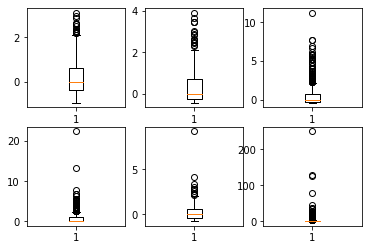

In [120]:
plt.subplot(231)
plt.boxplot(X_rs1[:,0])
plt.subplot(232)
plt.boxplot(X_rs1[:,1])
plt.subplot(233)
plt.boxplot(X_rs1[:,2])
plt.subplot(234)
plt.boxplot(X_rs1[:,3])
plt.subplot(235)
plt.boxplot(X_rs1[:,4])
plt.subplot(236)
plt.boxplot(X_rs1[:,5])
plt.show()

In [121]:
# Based on above histograms, data has outliers. 
# Hence identify and remove outliers based on dbscan algorithm.

In [122]:
core_samples, labels = dbscan(X_rs1, eps=5, min_samples=5)

In [123]:
#labels

In [124]:
np.where(labels==-1)[0].shape #count the number of outliers

(13,)

In [125]:
indices = np.where(labels==0)[0]

In [126]:
X_rs1_clean = X_rs1[indices] #data with outliers removed

In [127]:
X_rs1_clean.shape

(640, 6)

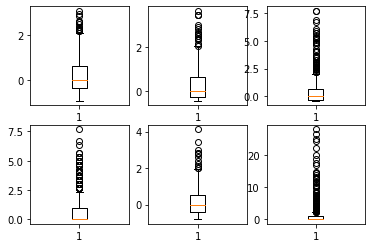

In [128]:
#draw boxplots to check if outliers have been removed
plt.subplot(231)
plt.boxplot(X_rs1_clean[:,0])
plt.subplot(232)
plt.boxplot(X_rs1_clean[:,1])
plt.subplot(233)
plt.boxplot(X_rs1_clean[:,2])
plt.subplot(234)
plt.boxplot(X_rs1_clean[:,3])
plt.subplot(235)
plt.boxplot(X_rs1_clean[:,4])
plt.subplot(236)
plt.boxplot(X_rs1_clean[:,5])
plt.show()

In [129]:
X_categorical_clean = X_categorical[indices] #corr. categorical data with outliers removed

In [130]:
X_categorical_clean.shape

(640, 40)

In [131]:
X_clean = hstack((X_rs1_clean, X_categorical_clean))

In [132]:
X_clean.shape

(640, 46)

In [133]:
y_clean = y[indices] #remove traget values corr. to outliers

In [134]:
y_clean.shape

(640, 1)

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.25, random_state=1)

# Develop models using data without outliers

In [136]:
# Random Forest Classifier
rfc3 = RandomForestClassifier(n_estimators=200, max_depth=None, 
    min_samples_split=2, min_samples_leaf=1, max_features='sqrt', 
    random_state=1, class_weight="balanced_subsample")

In [137]:
rfc3 = rfc3.fit(X_train, np.ravel(y_train))

In [138]:
rfc3.score(X_test, np.ravel(y_test))

0.9

In [139]:
# Extra Trees Classifier
etc3 = ExtraTreesClassifier(n_estimators=200, max_features="sqrt", bootstrap=True,
            random_state=1, class_weight="balanced_subsample")

In [140]:
etc3 = etc3.fit(X_train, np.ravel(y_train))

In [141]:
etc3.score(X_test, np.ravel(y_test))

0.89375

In [142]:
# Logistic Regression CV
LogRegCV3 = LogisticRegressionCV(Cs=20, solver='sag', max_iter=10000,
                class_weight='balanced', multi_class='ovr', random_state=1)

In [143]:
LogRegCV3 = LogRegCV3.fit(X_train, np.ravel(y_train))

/Users/babu/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [144]:
LogRegCV3.score(X_test, np.ravel(y_test))

0.8875

In [145]:
#SVC

In [146]:
svc3 = SVC(C=10.0, kernel='rbf', gamma='scale', class_weight='balanced', random_state=1)

In [147]:
svc3 = svc3.fit(X_train, np.ravel(y_train))

In [148]:
svc3.score(X_test, np.ravel(y_test)) 

0.875